In [1]:
import os
import sys
import random
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
import qiskit.qasm2 as qasm2
from pyzx.circuit import Circuit as ZxCircuit
import pyzx as zx
from topologiq.scripts.runner import runner
from topologiq.utils.interop_pyzx import pyzx_g_to_simple_g

In [2]:
def steane_encoding() -> QuantumCircuit:
    ancilla = QuantumRegister(3, "ancilla")
    data = QuantumRegister(7, "data")
    bits = ClassicalRegister(3, "bits")
    qc = QuantumCircuit(ancilla, data, bits)

    qc.h(ancilla[0])
    qc.cx(ancilla[0], data[0])
    qc.cx(ancilla[0], data[1])
    qc.cx(ancilla[0], data[2])
    qc.cx(ancilla[0], data[3])
    qc.h(ancilla[0])
    qc.measure(ancilla[0], bits[0])

    qc.h(ancilla[1])
    qc.cx(ancilla[1], data[0])
    qc.cx(ancilla[1], data[1])
    qc.cx(ancilla[1], data[4])
    qc.cx(ancilla[1], data[5])
    qc.h(ancilla[1])
    qc.measure(ancilla[1], bits[1])

    qc.h(ancilla[2])
    qc.cx(ancilla[2], data[0])
    qc.cx(ancilla[2], data[2])
    qc.cx(ancilla[2], data[4])
    qc.cx(ancilla[2], data[6])
    qc.h(ancilla[2])
    qc.measure(ancilla[2], bits[2])

    return qc



def qiskit2zx(circuit: QuantumCircuit) -> ZxCircuit:
    qasm_str = qasm2.dumps(circuit)
    zx_circuit = ZxCircuit.from_qasm(qasm_str)
    return zx_circuit

In [3]:
circuit = steane_encoding()
print(circuit)
print(qasm2.dumps(circuit))
zx_circuit = qiskit2zx(circuit)
print(zx_circuit)
g = zx_circuit.to_graph(fix_io=True)
zx.draw(g, labels=True)

           ┌───┐                                   ┌───┐               ┌─┐     »
ancilla_0: ┤ H ├──■────■─────────■──────────────■──┤ H ├───────────────┤M├─────»
           ├───┤  │    │         │              │  └───┘          ┌───┐└╥┘     »
ancilla_1: ┤ H ├──┼────┼────■────┼────■─────────┼────■─────────■──┤ H ├─╫──────»
           ├───┤  │    │    │    │    │         │    │         │  └───┘ ║      »
ancilla_2: ┤ H ├──┼────┼────┼────┼────┼────■────┼────┼────■────┼────■───╫───■──»
           └───┘┌─┴─┐  │  ┌─┴─┐  │    │  ┌─┴─┐  │    │    │    │    │   ║   │  »
   data_0: ─────┤ X ├──┼──┤ X ├──┼────┼──┤ X ├──┼────┼────┼────┼────┼───╫───┼──»
                └───┘┌─┴─┐└───┘  │  ┌─┴─┐└───┘  │    │    │    │    │   ║   │  »
   data_1: ──────────┤ X ├───────┼──┤ X ├───────┼────┼────┼────┼────┼───╫───┼──»
                     └───┘     ┌─┴─┐└───┘       │    │  ┌─┴─┐  │    │   ║   │  »
   data_2: ────────────────────┤ X ├────────────┼────┼──┤ X ├──┼────┼───╫───┼──»
                            

In [4]:
zx.full_reduce(g)
zx.to_rg(g)
random.seed(101)
fig_data = zx.draw(g, labels=True)

.
.
SUCCESS!!! Duration: 0.98s. (attempt), 2.30s (total).
Visualisations enabled. For faster runtimes, disable visualisations.


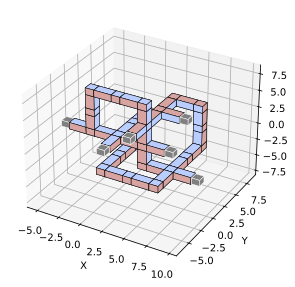

In [5]:
simple_graph = pyzx_g_to_simple_g(g)

# PARAMS & HYPERPARAMS
circuit_name = "steane_encoding"
visualisation = "final" # # Calls an interactive 3D visualisation at the end. Change to None to deactivate visualisation.
animation = None  # Change to "GIF" or "MP4" for a summary animation of the full process, at significant cost in runtimes due to the need to create and stitch many PNGs together.
VALUE_FUNCTION_HYPERPARAMS = (
    -1,  # Weight for lenght of path
    -1,  # Weight for number of "beams" broken by path
)

kwargs = {
    "weights": VALUE_FUNCTION_HYPERPARAMS,
    "length_of_beams": 9,
}

simple_graph_after_use, edge_pths, lattice_nodes, lattice_edges = runner(
    simple_graph,
    circuit_name,
    min_succ_rate=60,
    strip_ports=False,
    hide_ports=False,
    max_attempts=10,
    stop_on_first_success=True,
    visualise=(visualisation, animation),
    log_stats=False,
    debug=False,
    fig_data=fig_data,
    **kwargs
)